## **Evaluación de modelos** 

In [51]:
from tensorflow.keras.models import load_model
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import os
import pandas as pd
import joblib
from adjustText import adjust_text


In [52]:
import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
sys.path.append(str(PROJECT_ROOT))

from functions.preparation import data_version_a, data_version_b

In [53]:
path_no_outliers_data = "../data/processed/no_outliers_data.csv"

# Dataset version A (para regresión lineal y MLPs)
(X_train_a, X_test_a, y_train_a, y_test_a, 
 x_scaler, y_scaler, encoding, global_mean_a, features_a,
 categorical_columns, numerical_columns_a) = data_version_a(path_no_outliers_data)

# Dataset version B (para decision tree, random forest, XGBoost y LightGBM)
(X_train_b,
 X_test_b,
 y_train_b,
 y_test_b,
 global_mean_b,
 maps_encoding,
 features_b, numerical_columns_b) = data_version_b(path_no_outliers_data, log_transformed=False)

# Dataset version C (para decision tree, random forest, XGBoost y LightGBM pero con y_train con Log)
(X_train_c,
 X_test_c,
 y_train_c,
 y_test_c,
 global_mean_c,
 maps_encoding_c,
 features_c, numerical_columns_c) = data_version_b(path_no_outliers_data, log_transformed=True)


def get_file_size_mb(filepath):
    """Devuelve el tamaño del archivo en Megabytes."""
    # os.path.getsize devuelve el tamaño en bytes
    bytes_size = os.path.getsize(filepath)
    return bytes_size / (1024 * 1024)

In [54]:
y_train_b

87169      4990.0
51560     14350.0
30787     17990.0
14265     28690.0
119973    15999.0
           ...   
146449    12490.0
119906    25950.0
17730     18990.0
28030     19880.0
15725      8990.0
Name: price_in_euro, Length: 130419, dtype: float64

In [55]:
y_train_c


87169      8.515392
51560      9.571575
30787      9.797627
14265     10.264339
119973     9.680344
            ...    
146449     9.432764
119906    10.163965
17730      9.851720
28030      9.897520
15725      9.103979
Name: price_in_euro, Length: 130419, dtype: float64

In [56]:
y_test_b

77674     49990.0
40104     12650.0
48442     25190.0
74746     33840.0
116975    27990.0
           ...   
100081    18100.0
35930      2699.0
104210    16980.0
158031    21590.0
19845     27800.0
Name: price_in_euro, Length: 32605, dtype: float64

In [57]:
y_test_c

77674     49990.0
40104     12650.0
48442     25190.0
74746     33840.0
116975    27990.0
           ...   
100081    18100.0
35930      2699.0
104210    16980.0
158031    21590.0
19845     27800.0
Name: price_in_euro, Length: 32605, dtype: float64

In [58]:
# Regresión lineal - Dataset A
path_file_linear_regression = "../models/linear_regression.pkl"

model_lr = joblib.load(path_file_linear_regression)["model"]
train_time_lr = joblib.load(path_file_linear_regression)["training_time"]

start_time = time.time()
y_pred_lr_scaled = model_lr.predict(X_test_a)
y_pred_lr = y_scaler.inverse_transform(y_pred_lr_scaled).flatten()
end_time = time.time()

predict_time_lr = (end_time - start_time)
size_lr = get_file_size_mb(path_file_linear_regression)


In [59]:
# Árbol de decisión - Dataset B
path_file_decision_tree = "../models/decision_tree.pkl"

model_dt = joblib.load(path_file_decision_tree)["model"]
train_time_dt = joblib.load(path_file_decision_tree)["training_time"]

start_time = time.time()
y_pred_dt = model_dt.predict(X_test_b)
end_time = time.time()

predict_time_dt = (end_time - start_time)
size_dt = get_file_size_mb(path_file_decision_tree)


In [60]:
# Bosque aleatorio - Dataset B
path_file_random_forest = "../models/random_forest.pkl"

model_rf = joblib.load(path_file_random_forest)["model"]
train_time_rf = joblib.load(path_file_random_forest)["training_time"]

start_time = time.time()
y_pred_rf = model_rf.predict(X_test_b)
end_time = time.time()

predict_time_rf = (end_time - start_time)
size_rf = get_file_size_mb(path_file_random_forest)


In [61]:
# XGBoost - Dataset B
path_file_xgboost = "../models/xgboost.pkl"

model_xgb = joblib.load(path_file_xgboost)["model"]
train_time_xgb = joblib.load(path_file_xgboost)["training_time"]

start_time = time.time()
y_pred_xgb = model_xgb.predict(X_test_b)
end_time = time.time()

predict_time_xgb = (end_time - start_time)
size_xgb = get_file_size_mb(path_file_xgboost)


In [62]:
# LightGBM - Dataset B
path_file_lgbm = "../models/lightgbm.pkl"

model_lgbm = joblib.load(path_file_lgbm)["model"]
train_time_lgbm = joblib.load(path_file_lgbm)["training_time"]

start_time = time.time()
y_pred_lgbm = model_lgbm.predict(X_test_b)
end_time = time.time()

predict_time_lgbm = (end_time - start_time)
size_lgbm = get_file_size_mb(path_file_lgbm)


In [63]:
# Ensamble modelos (Random Forest + XGBoost) - Dataset B
path_ensamble_model = "../models/ensamble_model.pkl"

ensamble_bundle = joblib.load(path_ensamble_model)
rf_clean = ensamble_bundle["base_model_rf"]
xgb_clean = ensamble_bundle["base_model_xgb"]
meta_model = ensamble_bundle["meta_model"]
train_time_ensamble = ensamble_bundle["training_time"]

start_time = time.time()
preds_rf_test = rf_clean.predict(X_test_b)
preds_xgb_test = xgb_clean.predict(X_test_b)

X_meta_test = np.column_stack([preds_rf_test, preds_xgb_test])
y_pred_ensamble = meta_model.predict(X_meta_test)
end_time = time.time()

predict_time_ensamble = (end_time - start_time)
size_ensamble = get_file_size_mb(path_ensamble_model)


In [64]:
# Perceptrón Multicapa (MLP) - Dataset A
path_file_mlp = "../models/mlp_model_best.keras"
path_file_mlp_assets = "../models/mlp_assets.joblib"
train_time_mlp = joblib.load(path_file_mlp_assets)["training_time"]

mlp = load_model(path_file_mlp)

start_time = time.time()
y_pred_scaled_mlp = mlp.predict(X_test_a)
y_pred_mlp = y_scaler.inverse_transform(y_pred_scaled_mlp).flatten()
end_time = time.time()

predict_time_mlp = (end_time - start_time)
size_mlp = get_file_size_mb(path_file_mlp) + get_file_size_mb(path_file_mlp_assets)


1019/1019 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step


In [65]:
# MLP residual - Dataset A
path_file_mlp_residual = "../models/mlp_residual_model.keras"
path_file_mlp_r_assets = "../models/mlp_r_assets.joblib"
train_time_mlp_r = joblib.load(path_file_mlp_r_assets)["training_time"]

# Modelo MLP residual 
mlp_residual = load_model(path_file_mlp_residual)

start_time = time.time()
y_pred_scaled_mlpr = mlp_residual.predict(X_test_a)
y_pred_mlpr = y_scaler.inverse_transform(y_pred_scaled_mlpr).flatten()
end_time = time.time()

predict_time_mlpr = (end_time - start_time)
size_mlpr = get_file_size_mb(path_file_mlp_residual) + get_file_size_mb(path_file_mlp_r_assets)


1019/1019 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


In [66]:
# Árbol de decisión Log - Dataset C
path_file_decision_tree_log = "../models/decision_tree_log.pkl"

model_dt_log = joblib.load(path_file_decision_tree_log)["model"]
train_time_dt_log = joblib.load(path_file_decision_tree_log)["training_time"]

start_time = time.time()
y_pred_dt_log_scaled = model_dt_log.predict(X_test_c)
y_pred_dt_log = np.expm1(y_pred_dt_log_scaled)
end_time = time.time()

predict_time_dt_log = (end_time - start_time)
size_dt_log = get_file_size_mb(path_file_decision_tree_log)


In [67]:
# Bosque aleatorio Log - Dataset C
path_file_random_forest_log = "../models/random_forest_log.pkl"

model_rf_log = joblib.load(path_file_random_forest_log)["model"]
train_time_rf_log = joblib.load(path_file_random_forest_log)["training_time"]

start_time = time.time()
y_pred_rf_log_scaled = model_rf_log.predict(X_test_c)
y_pred_rf_log = np.expm1(y_pred_rf_log_scaled)
end_time = time.time()

predict_time_rf_log = (end_time - start_time)
size_rf_log = get_file_size_mb(path_file_random_forest_log)


In [68]:
# XGBoost Log - Dataset C
path_file_xgboost_log = "../models/xgboost_log.pkl"

model_xgb_log = joblib.load(path_file_xgboost_log)["model"]
train_time_xgb_log = joblib.load(path_file_xgboost_log)["training_time"]

start_time = time.time()
y_pred_xgb_log_scaled = model_xgb_log.predict(X_test_c)
y_pred_xgb_log = np.expm1(y_pred_xgb_log_scaled)
end_time = time.time()

predict_time_xgb_log = (end_time - start_time)
size_xgb_log = get_file_size_mb(path_file_xgboost_log)


In [69]:
# LightGBM Log - Dataset C
path_file_lgbm_log = "../models/lightgbm_log.pkl"

model_lgbm_log = joblib.load(path_file_lgbm_log)["model"]
train_time_lgbm_log = joblib.load(path_file_lgbm_log)["training_time"]

start_time = time.time()
y_pred_lgbm_log_scaled = model_lgbm_log.predict(X_test_c)
y_pred_lgbm_log = np.expm1(y_pred_lgbm_log_scaled)
end_time = time.time()

predict_time_lgbm_log = (end_time - start_time)
size_lgbm_log = get_file_size_mb(path_file_lgbm_log)


In [70]:
# Ensamble modelos con Log (Random Forest + XGBoost) - Dataset C
path_ensamble_model_log = "../models/ensamble_model_log.pkl"

ensamble_log_bundle = joblib.load(path_ensamble_model_log)
rf_clean_log = ensamble_log_bundle["base_model_rf"]
xgb_clean_log = ensamble_log_bundle["base_model_xgb"]
meta_model_log = ensamble_log_bundle["meta_model"]
train_time_ensamble_log = ensamble_log_bundle["training_time"]

start_time = time.time()
preds_rf_test_log_scaled = rf_clean_log.predict(X_test_b)
preds_xgb_test_log_scaled = xgb_clean_log.predict(X_test_b)

X_meta_test_log_scaled = np.column_stack([preds_rf_test_log_scaled, preds_xgb_test_log_scaled])
y_pred_ensamble_log_scaled = meta_model_log.predict(X_meta_test_log_scaled)
y_pred_ensamble_log = np.expm1(y_pred_ensamble_log_scaled)
end_time = time.time()

predict_time_ensamble_log = (end_time - start_time)
size_ensamble_log = get_file_size_mb(path_ensamble_model_log)


In [71]:
def evaluate_model_df(results_list, name, y_true, y_pred, train_time, predict_time, size):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    # Crear diccionario con resultados del modelo
    results = {
        "Modelo": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R²": round(r2, 3),
        "MAPE (%)": round(mape*100, 2),
        "Entrenamiento (min)": round(train_time/60, 2), 
        "Predicción (seg)": round(predict_time, 2),
        "Tamaño (MB)": round(size, 2),
    }

    # Agregar al listado acumulado
    results_list.append(results)
    return results_list


# Lista para almacenar los resultados
results_all = []

# Evaluar todos los modelos entrenados
results_all = evaluate_model_df(
        results_all, "Regresión Lineal", y_test_a, y_pred_lr, train_time_lr, predict_time_lr, size_lr
)

results_all = evaluate_model_df(
        results_all, "Árbol de Decisión", y_test_b, y_pred_dt, train_time_dt, predict_time_dt, size_dt
)

results_all = evaluate_model_df(
        results_all, "Random Forest", y_test_b, y_pred_rf, train_time_rf, predict_time_rf, size_rf
)

results_all = evaluate_model_df(
        results_all, "XGBoost", y_test_b, y_pred_xgb, train_time_xgb, predict_time_xgb, size_xgb
)

results_all = evaluate_model_df(
        results_all, "LightGBM", y_test_b, y_pred_lgbm, train_time_lgbm, predict_time_lgbm, size_lgbm
)

results_all = evaluate_model_df(
        results_all, "Ensamble de modelos", y_test_b, y_pred_ensamble, train_time_ensamble, predict_time_ensamble, size_ensamble
)

results_all = evaluate_model_df(
        results_all, "MLP", y_test_a, y_pred_mlp, train_time_mlp, predict_time_mlp, size_mlp
)

results_all = evaluate_model_df(
        results_all, "MLP Residual", y_test_a, y_pred_mlpr, train_time_mlp_r, predict_time_mlpr, size_mlpr
)

results_all = evaluate_model_df(
        results_all, "Árbol de Decisión Log", y_test_b, y_pred_dt_log, train_time_dt_log, predict_time_dt_log, size_dt_log
)

results_all = evaluate_model_df(
        results_all, "Random Forest Log", y_test_b, y_pred_rf_log, train_time_rf_log, predict_time_rf_log, size_rf_log
)

results_all = evaluate_model_df(
        results_all, "XGBoost Log", y_test_b, y_pred_xgb_log, train_time_xgb_log, predict_time_xgb_log, size_xgb_log
)

results_all = evaluate_model_df(
        results_all, "LightGBM Log", y_test_b, y_pred_lgbm_log, train_time_lgbm_log, predict_time_lgbm_log, size_lgbm_log
)

results_all = evaluate_model_df(
        results_all, "Ensamble de modelos Log", y_test_b, y_pred_ensamble_log, train_time_ensamble_log, predict_time_ensamble_log, size_ensamble_log
)

# Convertir resultados a DataFrame
df_results = pd.DataFrame(results_all)

# Mostrar resultados ordenados por RMSE (de menor a mayor)
df_results = df_results.sort_values(by="MAPE (%)", ascending=True).reset_index(drop=True)

path_results = "../results/models_results.csv"
df_results.to_csv(path_results, index=False)

display(df_results)






,Modelo,MAE,RMSE,R²,MAPE (%),Entrenamiento (min),Predicción (seg),Tamaño (MB)
0,Ensamble de modelos Log,2212.61,3668.96,0.901,13.45,26.02,1.07,935.38
1,Random Forest Log,2213.75,3696.85,0.899,13.67,2.50,1.05,929.34
2,XGBoost Log,2356.47,3867.23,0.890,13.68,1.27,0.01,6.07
3,Ensamble de modelos,2178.61,3579.90,0.906,13.90,28.00,1.15,938.51
4,LightGBM Log,2329.35,3774.15,0.895,13.93,4.51,0.02,0.91
5,XGBoost,2228.19,3616.58,0.904,14.52,3.99,0.01,9.80
6,Random Forest,2218.06,3634.67,0.903,14.65,2.36,1.04,928.73
7,LightGBM,2290.12,3664.88,0.901,14.75,4.07,0.04,0.89
8,MLP Residual,2243.83,3731.44,0.898,14.94,7.33,0.56,0.60
9,MLP,2423.41,3931.91,0.886,15.00,1.58,0.56,0.20


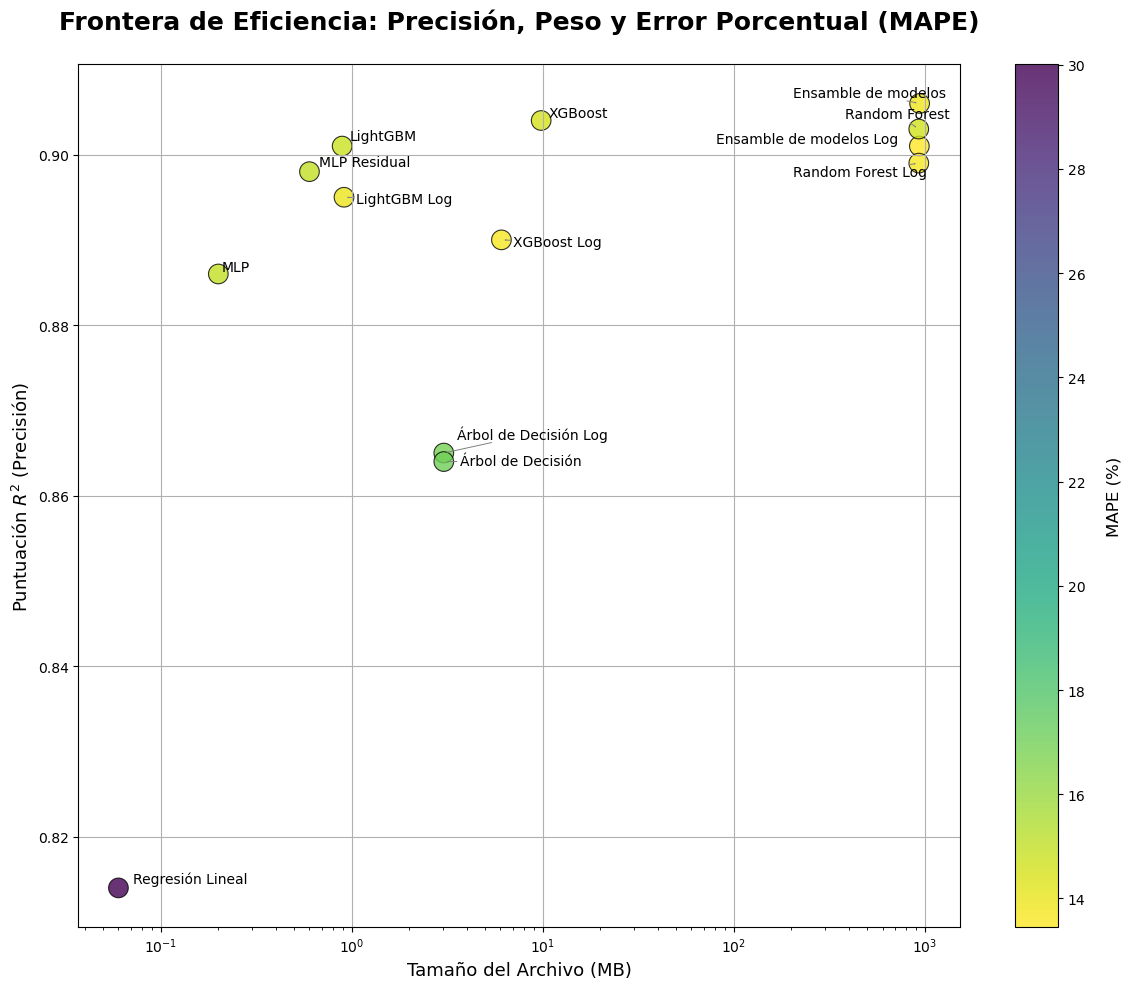

In [72]:
def efficiency_graph(df):
    
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(
        data=df,
        x="Tamaño (MB)",
        y="R²",
        c="MAPE (%)",
        cmap="viridis_r",
        s=200,
        edgecolors="black",
        linewidth=0.8,
        alpha=0.8
    )
    plt.xscale("log")

    # Barra de color
    cbar = plt.colorbar(scatter)
    cbar.set_label("MAPE (%)", fontsize=12, labelpad=15)

    texts = []
    for i in range(df.shape[0]):
        texts.append(plt.text(
            df["Tamaño (MB)"][i],
            df["R²"][i],
            df["Modelo"][i]
        ))
    
    adjust_text(texts,
                only_move={"points":"y", "texts":"y"},
                arrowprops=dict(arrowstyle="->", color="gray"), lw=0.7)
    
    plt.title('Frontera de Eficiencia: Precisión, Peso y Error Porcentual (MAPE)', fontsize=18, pad=25, fontweight='bold')
    plt.xlabel('Tamaño del Archivo (MB)', fontsize=13)
    plt.ylabel('Puntuación $R^2$ (Precisión)', fontsize=13)
    plt.grid(True)

    plt.tight_layout()

    path_efficiency_graph = "../results/efficiency_graph.png"
    plt.savefig(
        path_efficiency_graph,
        bbox_inches="tight",
        pad_inches=0.05,
        dpi=300
    )

    plt.show()

efficiency_graph(df_results)

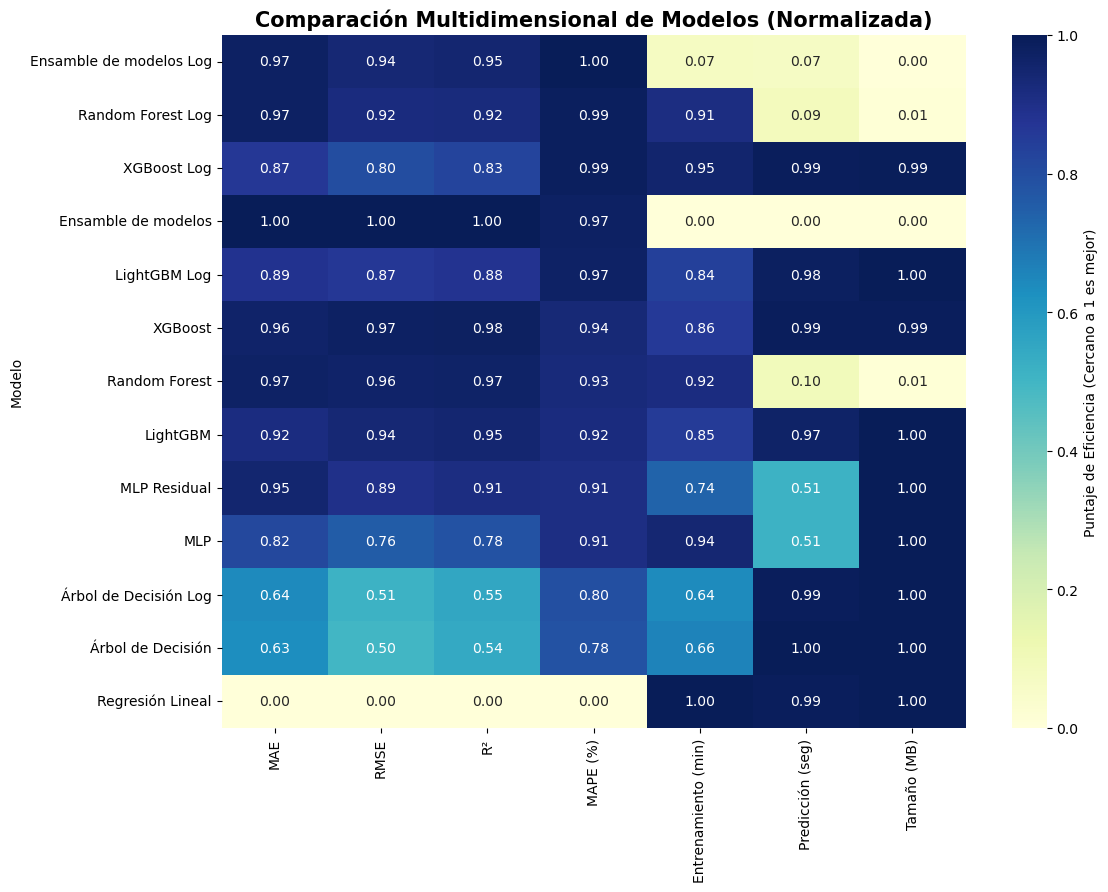

In [73]:
def heatmap_models_graphics(df):
    numerical_columns = [
        "MAE", "RMSE", "R²", "MAPE (%)", "Entrenamiento (min)", "Predicción (seg)", "Tamaño (MB)"
    ]

    # Cambio de índice
    df_heat = df.set_index("Modelo")[numerical_columns]

    # Normalización 0-1
    for col in numerical_columns:
        df_heat[col] = (df_heat[col] - df_heat[col].min()) / (df_heat[col].max() - df_heat[col].min())

    # Métricas donde "menos es mejor"
    invert_columns = [col for col in numerical_columns if col != "R²"]

    # Invertir columnas
    df_heat[invert_columns] = 1 - df_heat[invert_columns]

    plt.figure(figsize=(12, 9))
    sns.heatmap(
        df_heat,
        annot=True,
        cmap="YlGnBu",
        fmt=".2f",
        cbar_kws={"label": "Puntaje de Eficiencia (Cercano a 1 es mejor)"}
    )
    plt.title("Comparación Multidimensional de Modelos (Normalizada)", fontsize=15, fontweight="bold")

    path_heatmap_models_graphics = "../results/heatmap_models_graphics.png"
    plt.savefig(
        path_heatmap_models_graphics,
        bbox_inches="tight",
        pad_inches=0.05,
        dpi=300
    )


    plt.show()

heatmap_models_graphics(df_results)

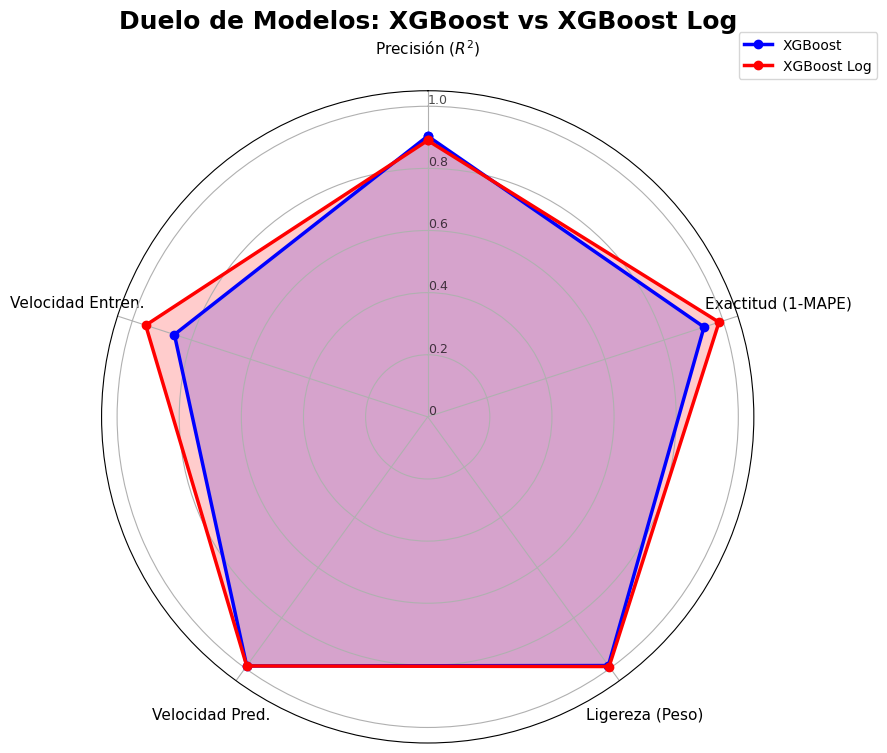

In [74]:
def plot_radar_comparison(df, model1_name, model2_name):
    # Métricas
    metrics = {
        "R²": "Precisión ($R^2$)",
        "MAPE (%)": "Exactitud (1-MAPE)",
        "Tamaño (MB)": "Ligereza (Peso)",
        "Predicción (seg)": "Velocidad Pred.",
        "Entrenamiento (min)": "Velocidad Entren."
    }

    # Extraer sólo las etiquetas para el radar
    labels = list(metrics.values())

    # Número de variables
    num_vals = len(labels)

    # Normalización (0 - 1)
    df_norm = df.copy()
    for col in metrics.keys():
        if col != "R²": # R² ya está normalizada y no necesita ser invertida
            df_norm[col] = 1 - (df[col] - df[col].min()) / (df[col].max() - df[col].min())

    # Extracción de valores
    def get_values(model_name):
        # Filtra la fila del modelo y selecciona sólo las métricas
        values = (
            df_norm[df_norm["Modelo"] == model_name]
            [list(metrics.keys())]
            .values.flatten().tolist()
        )
        # Se repite el primer valor al final para cerrar el gráfico radar
        return values + values[:1] 
    
    # Valores normalizados de cada modelo
    values1 = get_values(model1_name)
    values2 = get_values(model2_name)

    # Generar ángilos equidistantes alrededor del círculo
    angles = np.linspace(0, 2 * np.pi, num_vals, endpoint=False).tolist()

    # Repetir el primer ángilo para cerrar el radar
    angles += angles[:1]

    # Crear una figura polar
    fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

    # Modelo 1
    # Línea del radar
    ax.plot(angles, values1, color="blue", linewidth=2.5, label=model1_name, marker="o", markersize=6)

    # Relleno del polígono
    ax.fill(angles, values1, color="blue", alpha=0.2)

    # Modelo 2
    ax.plot(angles, values2, color="red", linewidth=2.5, label=model2_name, marker="o", markersize=6)
    ax.fill(angles, values2, color="red", alpha=0.2)

    # El radar inicia arriba y gira en sentido horario
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Etiquetas de las métricas
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=11)

    # Separación extra para evitar que el texto se encime
    ax.tick_params(axis="x", pad=20)

    # Valores guía de la escala radial
    grid_values = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

    ax.set_rgrids(
        grid_values, 
        labels=[f"{v}" for v in grid_values],
        angle=0,
        color="black",
        size=9,
        alpha=0.7
    )

    # Establecer el límite
    ax.set_ylim(0, 1.05)

    plt.title(
        f"Duelo de Modelos: {model1_name} vs {model2_name}",
        size=18,
        fontweight="bold",
        pad=45
    )

    plt.legend(
        loc="upper right",
        bbox_to_anchor=(1.2, 1.1),
        frameon=True
    )

    plt.tight_layout()

    path_plot_radar_comparison = "../results/plot_radar_comparison.png"
    plt.savefig(
        path_plot_radar_comparison,
        bbox_inches="tight",
        pad_inches=0.05,
        dpi=300
    )

    plt.show()

plot_radar_comparison(df_results, "XGBoost", "XGBoost Log")


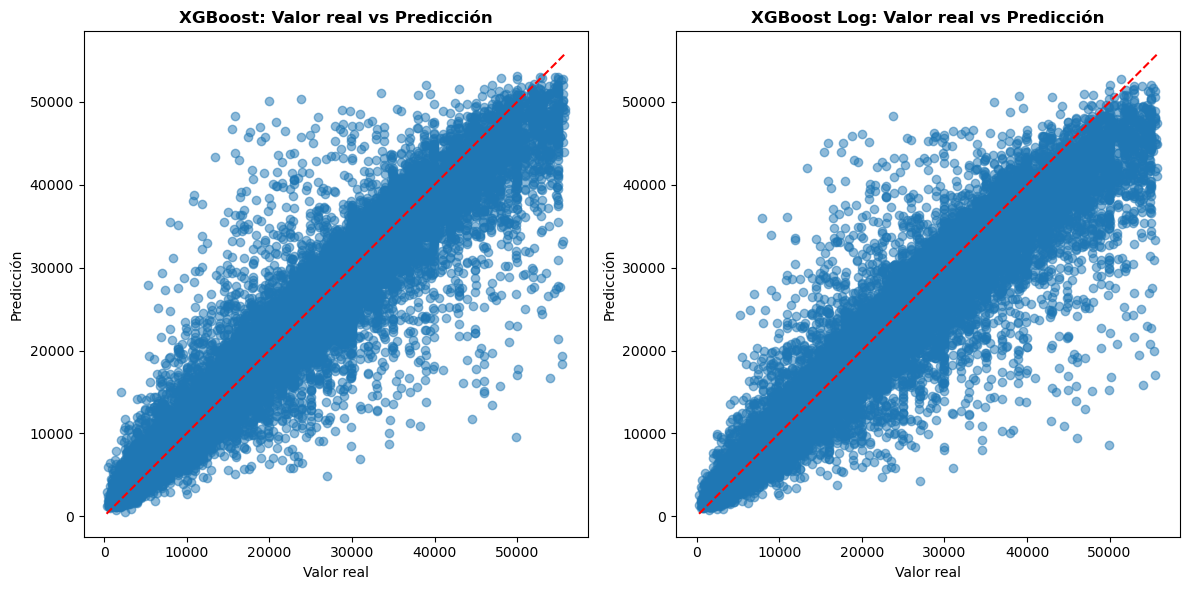

In [75]:
# Función para graficar valores predichos vs. reales
def graphic_pred_vs_true(model_1, model_2, y_true_1, y_true_2, y_pred_1, y_pred_2):

    plt.figure(figsize=(12, 6))

    # Modelo 1
    plt.subplot(1, 2, 1)
    plt.scatter(y_true_1, y_pred_1, alpha=0.5)
    plt.plot([y_true_1.min(), y_true_1.max()], [y_true_1.min(), y_true_1.max()], "r--")
    plt.xlabel("Valor real")
    plt.ylabel("Predicción")
    plt.title(f"{model_1}: Valor real vs Predicción", fontweight="bold")

    # Modelo 2
    plt.subplot(1, 2, 2)
    plt.scatter(y_true_2, y_pred_2, alpha=0.5)
    plt.plot([y_true_2.min(), y_true_2.max()], [y_true_2.min(), y_true_2.max()], "r--")
    plt.xlabel("Valor real")
    plt.ylabel("Predicción")
    plt.title(f"{model_2}: Valor real vs Predicción", fontweight="bold")
    
    plt.tight_layout()
    
    path_graphic_pred_vs_true = "../results/graphic_pred_vs_true.png"
    plt.savefig(
        path_graphic_pred_vs_true,
        bbox_inches="tight",
        pad_inches=0.05,
        dpi=300
    )
    
    plt.show()

# Graficar predicciones para el mejor modelo
graphic_pred_vs_true("XGBoost", "XGBoost Log", y_test_b, y_test_c, y_pred_xgb, y_pred_xgb_log)